# Intro to Data Analysis with Python
In the last class, we introduced basic programming concepts such as different data types, conditional statements, and looping. Today, we will focus on working with tabular data and some common tasks you may want to do when working with data. To do this, we will be using additonal libraries on top of the base functionality that comes with Python

## Import Pandas
Since we installed Anaconda, we already have additional libraries for data analysis installed. The first one we will work with is called `Pandas` which is a useful library for reading in and working with data. If you did not already have Pandas installed, you could install it with the following command: `conda install pandas` or `pip install pandas` if you were using base Python. Once you have a library installed, you will still need to `import` it to use it in your script. We will import Pandas below.

In [10]:
# importing pandas
# the `as pd` allows us to pandas functions with a shortened name
import pandas as pd

'C:\\Users\\ztd3zn\\OneDrive - University of Virginia\\0_Testing\\Python\\SpyderTest'

# Read in and view data
Now that we have `Pandas` imported, we can begin using it. For this workshop, we will be using data from a study on the ranges of pet cats in the UK and the US. A link to the study can be found [here](https://zslpublications.onlinelibrary.wiley.com/doi/10.1111/acv.12563) and the data can be downloaded [here](https://datarepository.movebank.org/search?query=Data%20from:%20The%20small%20home%20ranges%20and%20large%20local%20ecological%20impacts%20of%20pet%20cats). 
The first thing we will do is read in a csv file of this data with the `read_csv()` function. When we do this, it will store our data as a `DataFrame` object. Pandas DataFrames are 2D tabular data structures consisitng of rows and columns. DataFrames have built in methods to help manipulate them. We will learn more about those as we move through this workshop.

In [6]:
# read in data
cats_uk = pd.read_csv('data/Pet Cats United Kingdom.csv')
# there is also a function for reading in excel files (pd.read_excel())


FileNotFoundError: [Errno 2] No such file or directory: 'data/Pet Cats United Kingdom.csv'

Now that we've read in our data, we can begin investigating it. There are several useful methods for familarizing yourself with the information stored in a DataFrame. If you want to see a glimpse of your dataset, you can use the `.head()` method which returns the first 5 rows of your dataset. This can give you a sense of your columns and the types of information stored in them.

In [6]:
# calling head
cats_uk.head()

# if you want to see more rows of your dataset you can specify the number within the paranthesis
#cats_uk.head(10)

# there is also a parallel function to .head() called .tail() which will return a snapshot of the last rows of your data

,event-id,visible,timestamp,location-long,location-lat,algorithm-marked-outlier,ground-speed,height-above-ellipsoid,manually-marked-outlier,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,3395610551,True,2017-06-24 01:03:57.000,-5.113851,50.170315,NaN,684.0,154.67,NaN,gps,Felis catus,Ares,Ares,Pet Cats United Kingdom
1,3395610552,True,2017-06-24 01:11:20.000,-5.113851,50.170315,NaN,936.0,154.67,NaN,gps,Felis catus,Ares,Ares,Pet Cats United Kingdom
2,3395610553,True,2017-06-24 02:58:16.000,-5.113730,50.169876,NaN,2340.0,81.35,NaN,gps,Felis catus,Ares,Ares,Pet Cats United Kingdom
3,3395610554,True,2017-06-24 03:01:26.000,-5.113774,50.169827,NaN,0.0,67.82,NaN,gps,Felis catus,Ares,Ares,Pet Cats United Kingdom
4,3395610555,True,2017-06-24 03:51:58.000,-5.114247,50.170139,NaN,4896.0,118.03,NaN,gps,Felis catus,Ares,Ares,Pet Cats United Kingdom


While `.head()` is useful for viewing a snapshot of your data, it does not answer all the questions you may have about your dataset. For example, when working with data, it's important to keep track of how much data you have. You will want to know how many rows or observations you have and how many columns or attributes you have. This becomes particularly important when you begin manipulating your data because you may accidently remove or duplicate information. To find this information out, you can call `.shape`  which will return the number of rows and columns. Try it out below and see how many obersvations we have. 

In [7]:
# call .shape on ngrams.
cats_uk.shape

# .shape is not followed by '()' because we are accessing an attribute instead of calling a method

(18215, 14)

This gives us a sense of how much data we have, but we still have not summarized the type of information stored in each column. To get a better summary of our entire dataset, we can use the `.describe()` and `.info()` methods. The `.describe()` method will generate summary statistics for numeric columns and the `.info()` method will provide a list of the columns, the data type of each column, and the number of non-null values. Keeping track of null values is important because it can affect your analysis.

In [8]:
# call .describe()
cats_uk.describe()

,event-id,location-long,location-lat,ground-speed,height-above-ellipsoid
count,1.821500e+04,18215.000000,18215.000000,18215.000000,18215.000000
mean,3.618912e+09,-4.988242,50.296238,1911.484381,103.648265
std,1.934048e+08,0.301499,0.158353,4592.574178,245.705665
min,3.395611e+09,-5.758854,50.103519,0.000000,-550.070000
25%,3.459216e+09,-5.157051,50.153644,396.000000,48.870000
50%,3.544858e+09,-5.073365,50.236397,1080.000000,80.920000
75%,3.716220e+09,-4.795648,50.428098,2232.000000,119.430000
max,4.149498e+09,-4.208614,50.882217,277092.000000,8388.260000


In [9]:
# call .info()
cats_uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18215 entries, 0 to 18214
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   event-id                         18215 non-null  int64  
 1   visible                          18215 non-null  bool   
 2   timestamp                        18215 non-null  object 
 3   location-long                    18215 non-null  float64
 4   location-lat                     18215 non-null  float64
 5   algorithm-marked-outlier         211 non-null    object 
 6   ground-speed                     18215 non-null  float64
 7   height-above-ellipsoid           18215 non-null  float64
 8   manually-marked-outlier          140 non-null    object 
 9   sensor-type                      18215 non-null  object 
 10  individual-taxon-canonical-name  18215 non-null  object 
 11  tag-local-identifier             18215 non-null  object 
 12  individual-local-i

## Creating or deleting columns
Once you have read in a dataset, you may want to create additional columns or delete columns that you don't need. To create a column, you can use bracket notation with the name of your new column as such `dataframe['new_column'] = some_value` 


In [5]:
# creating a new column and setting the value to 0
cats_uk['new_column'] = 0

To delete columns, you use the `del` keyword. Let's delete the column we just created.

In [6]:
# deleting the column
del cats_uk['new_column']

# how can we check the column was deleted (there are multiple)
cats_uk.columns
cats_uk.info()

Index(['event-id', 'visible', 'timestamp', 'location-long', 'location-lat',
       'algorithm-marked-outlier', 'ground-speed', 'height-above-ellipsoid',
       'manually-marked-outlier', 'sensor-type',
       'individual-taxon-canonical-name', 'tag-local-identifier',
       'individual-local-identifier', 'study-name'],
      dtype='object')

# Indexing and filtering data

## Selecting columns
Now that we've seen some general summaries of our data, we may want to focus on a specific column or attribute. To access a column in a DataFrame, you use the following formats `dataframe.column_name` or `dataframe['column_name']`

In [50]:
# access the timestamp column
cats_uk['timestamp']  # dictionary syntax
cats_uk.timestamp     # attribute syntax

0        2017-06-24 01:03:57.000
1        2017-06-24 01:11:20.000
2        2017-06-24 02:58:16.000
3        2017-06-24 03:01:26.000
4        2017-06-24 03:51:58.000
                  ...           
18210    2017-11-26 15:37:52.000
18211    2017-11-26 15:40:59.000
18212    2017-11-26 16:27:31.000
18213    2017-11-26 16:34:26.000
18214    2017-11-27 00:09:29.000
Name: timestamp, Length: 18215, dtype: object

In [7]:
# Now try with the visible  column
cats_uk['visible']

0        True
1        True
2        True
3        True
4        True
         ... 
18210    True
18211    True
18212    True
18213    True
18214    True
Name: visible, Length: 18215, dtype: bool

Another way to access columns is with the `.loc` and `.iloc` attributes. The `.loc()` attribute uses labels to select data and the `.iloc()` attribute uses indeces to select data. Both will be called in a similar way where bracket notation is used to select data. The calls will look something like this `dataframe.loc[row_name(s), column_name(s)]` or `dataframe.iloc[row_index, column_index]`. If you would like to select all rows or all columns, you can use the `:` symbol. 

In [ ]:
# select timestamp with loc
cats_uk.loc[:,'timestamp']


Now you try:

In [13]:
# select timestamp with iloc
print("Selecting timestamp with iloc:")
print(cats_uk.iloc[:,2])
print("")

# select the first 11 rows and all columns
print("Selecting the first 11 rows:")
print(cats_uk.iloc[0:11,:])


Selecting timestamp with iloc:
0        2017-06-24 01:03:57.000
1        2017-06-24 01:11:20.000
2        2017-06-24 02:58:16.000
3        2017-06-24 03:01:26.000
4        2017-06-24 03:51:58.000
                  ...           
18210    2017-11-26 15:37:52.000
18211    2017-11-26 15:40:59.000
18212    2017-11-26 16:27:31.000
18213    2017-11-26 16:34:26.000
18214    2017-11-27 00:09:29.000
Name: timestamp, Length: 18215, dtype: object

Selecting the first 11 rows:
      event-id  visible  ... individual-local-identifier               study-name
0   3395610551     True  ...                        Ares  Pet Cats United Kingdom
1   3395610552     True  ...                        Ares  Pet Cats United Kingdom
2   3395610553     True  ...                        Ares  Pet Cats United Kingdom
3   3395610554     True  ...                        Ares  Pet Cats United Kingdom
4   3395610555     True  ...                        Ares  Pet Cats United Kingdom
5   3395610556     True  ...          

### Performing operations on columns
Now that we now how to access a specific column, we can use other methods or functions to gain more information. For example, we may want to know how many unique values are in a column. This can be particularly useful if you have a text column or one that represents different groups within your data. In the cats dataset, the individual-local-identifier column represents the different cats we have data for. So far, we've only seen 'Ares' within the individual-local-identifier column. Let's find out how many other cats are in the dataset. To do this, we will access the individual-local-identifier column and then use the 'unique()' function to return a list of unique values.

In [16]:
# accessing the Phrase column and then calling unique()
cats_uk['individual-local-identifier'].unique()
# when we call multiple attributes or fucntions together this is called chaining

# cal len() to get the length of the array
len(cats_uk['individual-local-identifier'].unique())

# we could also break up the process
# cat_names = cats_uk['individual-local-identifier']
# unique_cat_names = cat_names.unique()
# len(unqiue_cat_names)

# alternative syntax
# cats_uk.loc[:,'individual-local-identifier'].unique()

101

Based on the above code, we can see that we have 101 cats from the UK in our dataset. We may want to calculate summary statistics for each cat. To group data and perform calculations, you will use the `.groupby()` method. Once you have grouped your data, there are additional methods you can use to explore that data like `.first()` which prints the first entry from each group or you can use the `.get_group()` method to access a specific group. In this example, we will group by the 'individual-local-identifier' column.

In [15]:
# grouping by Phrase
grouped_cats = cats_uk.groupby("individual-local-identifier")

# printing the first entry of each group
print(grouped_cats.first())

# accessing the 'Abba' group
# comment out line above to see output
print(grouped_cats.get_group('Abba'))

                               event-id  ...               study-name
individual-local-identifier              ...                         
Abba                         3766092027  ...  Pet Cats United Kingdom
Alfie                        3940916883  ...  Pet Cats United Kingdom
Amber                        3507104811  ...  Pet Cats United Kingdom
Ares                         3395610551  ...  Pet Cats United Kingdom
Athena                       3395610893  ...  Pet Cats United Kingdom
...                                 ...  ...                      ...
Tommy                        3407274502  ...  Pet Cats United Kingdom
Whiskey                      3407590147  ...  Pet Cats United Kingdom
Wilfred                      3434561676  ...  Pet Cats United Kingdom
Winnie                       3459348570  ...  Pet Cats United Kingdom
Worf                         3766100196  ...  Pet Cats United Kingdom

[101 rows x 13 columns]
         event-id  visible  ... individual-local-identifier      

Now that we know how to work with a grouped object, let's calculate some summary statisitcs on the ground-speed column. To do this, we can call the function we're interested in after our grouped data frame object. For example, if we want to caclulate the mean of frequency per group, it would look like this `grouped_cats.mean()`. 

In [18]:
# calling the mean fucntion
grouped_cats.mean()

C:\Users\ztd3zn\AppData\Local\Temp\ipykernel_33936\1674230228.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_cats.mean()


,event-id,visible,location-long,location-lat,ground-speed,height-above-ellipsoid
individual-local-identifier,,,,,,
Abba,3.766092e+09,0.987952,-5.204463,50.163311,1603.951807,177.981566
Alfie,3.940917e+09,1.000000,-4.759988,50.344323,1931.679144,82.725668
Amber,3.507105e+09,0.995413,-4.637436,50.339869,1967.614679,56.305917
Ares,3.395611e+09,0.990291,-5.114268,50.170227,2285.825243,91.548350
Athena,3.395611e+09,1.000000,-5.114081,50.170166,2134.188679,87.520283
...,...,...,...,...,...,...
Tommy,3.407275e+09,0.968421,-5.112067,50.170578,2292.631579,88.518105
Whiskey,3.407590e+09,0.971429,-5.140374,50.153093,2272.702041,117.761755
Wilfred,3.434562e+09,0.974194,-5.123272,50.208769,2073.367742,55.683613


In the above code when we called the `.mean()` function, it calculated the mean for not just the ground-speed column, but for all numeric columns. If we want to only see the mean of ground-speed per cat then we will need to subset the columns first. We did this earlier by using `[]` and we will use the same method here. 

In [16]:
# subsetting the grouped data frame to only include 'ground-speed'
ground_speed = grouped_cats[['ground-speed']]
# calculate the mean
ground_speed.mean()


,ground-speed
individual-local-identifier,
Abba,1603.951807
Alfie,1931.679144
Amber,1967.614679
Ares,2285.825243
Athena,2134.188679
...,...
Tommy,2292.631579
Whiskey,2272.702041
Wilfred,2073.367742


In [19]:
# we could also chain everything together
cats_uk.groupby('individual-local-identifier')[['ground-speed']].mean()

,ground-speed
individual-local-identifier,
Abba,1603.951807
Alfie,1931.679144
Amber,1967.614679
Ares,2285.825243
Athena,2134.188679
...,...
Tommy,2292.631579
Whiskey,2272.702041
Wilfred,2073.367742


Now you try calculating the variance of the ground-speed per cat using the .var() method

In [17]:
# calculate variance using .var()
cats_uk.groupby('individual-local-identifier')[['ground-speed']].var()

,ground-speed
individual-local-identifier,
Abba,4.618889e+06
Alfie,5.823834e+06
Amber,6.774731e+06
Ares,6.952147e+06
Athena,7.212468e+06
...,...
Tommy,1.087389e+07
Whiskey,1.004095e+07
Wilfred,7.782795e+06


## Filtering rows
Not only can you subset columns, but you can also subset to specific rows. The first way we'll do this is by using logical statements. Let's start by only selecting data where the longitude is less than -5. We'll start by creating a logical statement that returns true for the years 1950 or later.

In [20]:
# checking if the longitude is less than -5
cats_uk['location-long'] < -5


0         True
1         True
2         True
3         True
4         True
         ...  
18210    False
18211    False
18212    False
18213    False
18214    False
Name: location-long, Length: 18215, dtype: bool

Now that we have a conditional statement, we can use that to filter to our rows of interest. To do that, we'll use the following syntax `dataframe[conditional_statment]`. This is illustrated below. 

In [21]:
cats_uk[cats_uk['location-long'] < -5]

,event-id,visible,timestamp,location-long,location-lat,algorithm-marked-outlier,ground-speed,height-above-ellipsoid,manually-marked-outlier,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,3395610551,True,2017-06-24 01:03:57.000,-5.113851,50.170315,NaN,684.0,154.67,NaN,gps,Felis catus,Ares,Ares,Pet Cats United Kingdom
1,3395610552,True,2017-06-24 01:11:20.000,-5.113851,50.170315,NaN,936.0,154.67,NaN,gps,Felis catus,Ares,Ares,Pet Cats United Kingdom
2,3395610553,True,2017-06-24 02:58:16.000,-5.113730,50.169876,NaN,2340.0,81.35,NaN,gps,Felis catus,Ares,Ares,Pet Cats United Kingdom
3,3395610554,True,2017-06-24 03:01:26.000,-5.113774,50.169827,NaN,0.0,67.82,NaN,gps,Felis catus,Ares,Ares,Pet Cats United Kingdom
4,3395610555,True,2017-06-24 03:51:58.000,-5.114247,50.170139,NaN,4896.0,118.03,NaN,gps,Felis catus,Ares,Ares,Pet Cats United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17896,4149451326,True,2017-11-30 00:29:18.000,-5.218778,50.236698,NaN,3060.0,116.41,NaN,gps,Felis catus,Seb-Tag,Seb,Pet Cats United Kingdom
17897,4149451327,True,2017-11-30 00:42:37.000,-5.218778,50.236698,NaN,3060.0,116.41,NaN,gps,Felis catus,Seb-Tag,Seb,Pet Cats United Kingdom
17898,4149451328,True,2017-11-30 00:46:15.000,-5.219236,50.236919,NaN,1116.0,139.00,NaN,gps,Felis catus,Seb-Tag,Seb,Pet Cats United Kingdom
17899,4149451329,True,2017-11-30 00:49:36.000,-5.219236,50.236919,NaN,1116.0,139.00,NaN,gps,Felis catus,Seb-Tag,Seb,Pet Cats United Kingdom


Now you try filtering the dataframe to rows where ground-speed is greater than 500

In [18]:
# filter cats_uk dataframe for rows where ground-speed is greater than 500
cats_uk[cats_uk['ground-speed'] > 500]

,event-id,visible,timestamp,location-long,location-lat,algorithm-marked-outlier,ground-speed,height-above-ellipsoid,manually-marked-outlier,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
0,3395610551,True,2017-06-24 01:03:57.000,-5.113851,50.170315,NaN,684.0,154.67,NaN,gps,Felis catus,Ares,Ares,Pet Cats United Kingdom
1,3395610552,True,2017-06-24 01:11:20.000,-5.113851,50.170315,NaN,936.0,154.67,NaN,gps,Felis catus,Ares,Ares,Pet Cats United Kingdom
2,3395610553,True,2017-06-24 02:58:16.000,-5.113730,50.169876,NaN,2340.0,81.35,NaN,gps,Felis catus,Ares,Ares,Pet Cats United Kingdom
4,3395610555,True,2017-06-24 03:51:58.000,-5.114247,50.170139,NaN,4896.0,118.03,NaN,gps,Felis catus,Ares,Ares,Pet Cats United Kingdom
5,3395610556,True,2017-06-24 03:55:03.000,-5.114099,50.170235,NaN,504.0,123.07,NaN,gps,Felis catus,Ares,Ares,Pet Cats United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18210,4149497976,True,2017-11-26 15:37:52.000,-4.521489,50.869320,NaN,1260.0,144.66,NaN,gps,Felis catus,Millie-Tag,Millie,Pet Cats United Kingdom
18211,4149497977,True,2017-11-26 15:40:59.000,-4.521498,50.869289,NaN,16380.0,136.60,NaN,gps,Felis catus,Millie-Tag,Millie,Pet Cats United Kingdom
18212,4149497978,True,2017-11-26 16:27:31.000,-4.521803,50.869438,NaN,4500.0,160.97,NaN,gps,Felis catus,Millie-Tag,Millie,Pet Cats United Kingdom
18213,4149497979,True,2017-11-26 16:34:26.000,-4.521946,50.869392,NaN,1044.0,179.81,NaN,gps,Felis catus,Millie-Tag,Millie,Pet Cats United Kingdom


If you wanted to subset the dataframe based on whether values occured in a list, you can use `.isin()` method. For example, we may want to subset to specific values in the Phrase column. 

In [22]:
# create a list of Phrases of interest
cat_name = ['Abba', 'Whiskey']

# subset dataframe
cats_uk[cats_uk['individual-local-identifier'].isin(cat_name)]

,event-id,visible,timestamp,location-long,location-lat,algorithm-marked-outlier,ground-speed,height-above-ellipsoid,manually-marked-outlier,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name
2188,3407590147,True,2017-07-09 01:04:12.000,-5.140461,50.152889,NaN,2124.0,99.24,NaN,gps,Felis catus,Whiskey-Tag,Whiskey,Pet Cats United Kingdom
2189,3407590148,True,2017-07-09 01:12:09.000,-5.140461,50.152889,NaN,1656.0,99.24,NaN,gps,Felis catus,Whiskey-Tag,Whiskey,Pet Cats United Kingdom
2190,3407590149,True,2017-07-09 08:49:38.000,-5.141140,50.152714,NaN,2016.0,93.28,NaN,gps,Felis catus,Whiskey-Tag,Whiskey,Pet Cats United Kingdom
2191,3407590150,True,2017-07-09 08:52:51.000,-5.142124,50.152718,NaN,684.0,53.46,NaN,gps,Felis catus,Whiskey-Tag,Whiskey,Pet Cats United Kingdom
2192,3407590151,True,2017-07-09 09:10:01.000,-5.142468,50.152870,NaN,10224.0,56.30,NaN,gps,Felis catus,Whiskey-Tag,Whiskey,Pet Cats United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14673,3766092105,True,2017-10-02 00:02:24.000,-5.204967,50.163212,NaN,4572.0,93.35,NaN,gps,Felis catus,Abba-Tag,Abba,Pet Cats United Kingdom
14674,3766092106,True,2017-10-02 00:25:55.000,-5.204967,50.163212,NaN,504.0,93.35,NaN,gps,Felis catus,Abba-Tag,Abba,Pet Cats United Kingdom
14675,3766092107,True,2017-10-02 02:52:45.000,-5.204786,50.163425,NaN,1080.0,159.20,NaN,gps,Felis catus,Abba-Tag,Abba,Pet Cats United Kingdom
14676,3766092108,True,2017-10-02 02:56:20.000,-5.204886,50.163494,NaN,360.0,133.09,NaN,gps,Felis catus,Abba-Tag,Abba,Pet Cats United Kingdom


# Combining data

There may be times when you need to combine observations from multiple datasets. For example, we have been working with data from the UK, but there is also a dataset from the US. Let's combine these two datasets and create one dataframe. To do this, we will use the `.concat()` function from Pandas. To call that function, you must provide a list of objects to be combined. The call will look like this `pd.concat([list of objects])`

In [20]:
# first read in the US dataset
cats_us = pd.read_csv('data/Pet Cats United States.csv')

# use the .append(function)
cats_combined = pd.concat([cats_uk, cats_us])

# how many oberservations do we have in the new data set?
cats_us.shape

C:\Users\ztd3zn\AppData\Local\Temp\ipykernel_53048\2565435115.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  cats_us = pd.read_csv('data/Pet Cats United States.csv')


(659770, 15)

There may also be times when you want join additonal attributes to your dataset. For example, we have cat specific attributes in the Pet Cats United Kingdom-reference-data.csv file. Let's read that file in as well and then join the animal-life-stage column to our dataset, so we can investigate age in relation to our other attributes. To do this, we will use the `.merge()` method with the following syntax `dataframe.merge(other_dataframe)`. Although not required, it is also good practice to specify which column(s) you're performing the join on by using the `on` parameter and how you would like the join performed by using the `how` parameter. 


In [21]:
# read in uk reference data
uk_reference = pd.read_csv('data/Pet Cats United Kingdom-reference-data.csv')

# subset reference data to just animal-id and animal-life-stage
uk_reference_sub = uk_reference[['animal-id', 'animal-life-stage']]

# example of left join
left_join = cats_combined.merge(uk_reference_sub, left_on='individual-local-identifier', right_on='animal-id')

# view left join output
left_join.head()




,event-id,visible,timestamp,location-long,location-lat,algorithm-marked-outlier,ground-speed,height-above-ellipsoid,manually-marked-outlier,sensor-type,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier,study-name,heading,animal-id,animal-life-stage
0,3395610551,True,2017-06-24 01:03:57.000,-5.113851,50.170315,NaN,684.0,154.67,NaN,gps,Felis catus,Ares,Ares,Pet Cats United Kingdom,NaN,Ares,3 years
1,3395610552,True,2017-06-24 01:11:20.000,-5.113851,50.170315,NaN,936.0,154.67,NaN,gps,Felis catus,Ares,Ares,Pet Cats United Kingdom,NaN,Ares,3 years
2,3395610553,True,2017-06-24 02:58:16.000,-5.113730,50.169876,NaN,2340.0,81.35,NaN,gps,Felis catus,Ares,Ares,Pet Cats United Kingdom,NaN,Ares,3 years
3,3395610554,True,2017-06-24 03:01:26.000,-5.113774,50.169827,NaN,0.0,67.82,NaN,gps,Felis catus,Ares,Ares,Pet Cats United Kingdom,NaN,Ares,3 years
4,3395610555,True,2017-06-24 03:51:58.000,-5.114247,50.170139,NaN,4896.0,118.03,NaN,gps,Felis catus,Ares,Ares,Pet Cats United Kingdom,NaN,Ares,3 years


# Visualization
Another great way to get familiar with your day is by visualizing it. We'll use the `matplotlib` package to create some basic plots of our data. This package is a common one in Python and works well with pandas. There are other plotting library options, depending on what you're trying to accomplish. 

In [23]:
import matplotlib.pyplot as plt 

Now that we've imported matplot lib, let's start by making a line chart of ground-speed for the Ares. To do this, we'll first subset the data to just Ares and then use the `plt.plot()` method to generate the line chart. After generating the chart, we will need to call `plt.show()` to actually view it. 

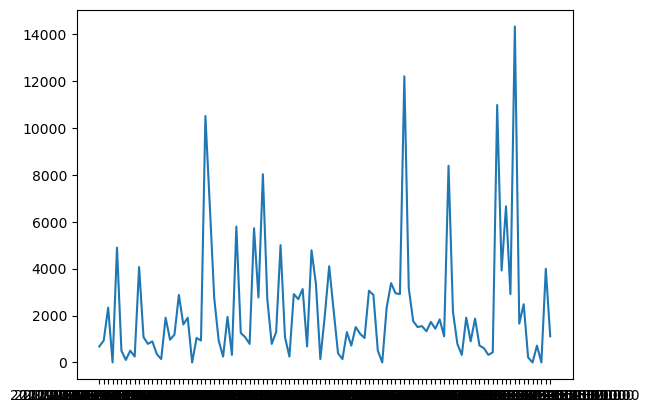

In [63]:
# subsetting data
ares = cats_uk[cats_uk['individual-local-identifier']=='Ares']

# plotting
plt.plot(ares['timestamp'], ares['ground-speed'])
plt.show()


Although this makes a plot, it's missing many elements. Let's try adding some additional features like axis labels to make it better. To do this, we'll use methods like `.title()` and `.xlabel()`. To learn more about the methods associated with plot objects from matplot lib you can review the documention here: https://matplotlib.org/stable/api/pyplot_summary.html

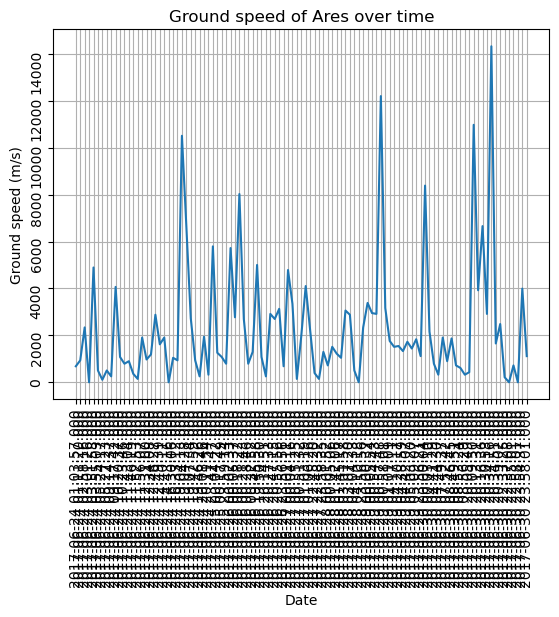

In [64]:
# plotting
plt.xlabel('Date')  #adding labels
plt.ylabel('Ground speed (m/s)')
plt.title("Ground speed of Ares over time") #adding a title
plt.grid()   # adding a grid to the background
plt.plot(ares['timestamp'], ares['ground-speed'])
plt.tick_params(rotation=90)
plt.show()


Pandas dataframe objects have built-in functionality to use pyplot from matplotlib, so another way to call the `.plot()` method is directly after a pandas dataframe. If you do it that way, then you don't need to specify the dataframe when calling the columns. 

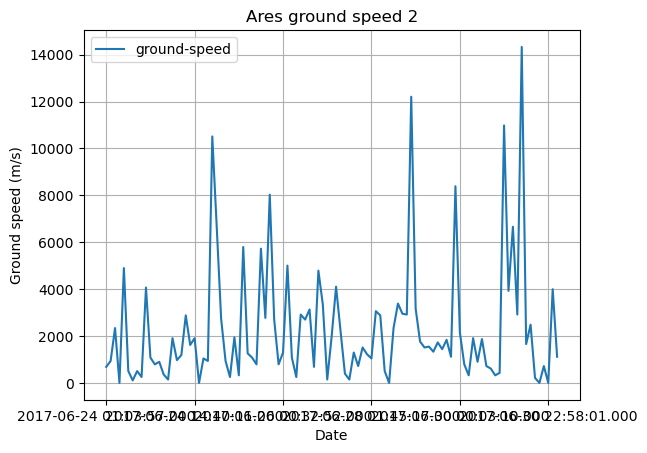

In [65]:
# calling .plot from the arts data frame
ares.plot('timestamp', 'ground-speed', 
          title = "Ares ground speed 2", ylabel = "Ground speed (m/s)", xlabel = "Date", 
          grid = True) # specifying additional info from within
plt.show()

Above we have focussed on create a chart with a single line representing the speed of one cat over time, but if we want a one charts with multiple lines representing the different cats in our dataset? To do this, we can use the `.groupby()` method we used above in combination with the `.plot()` method. 

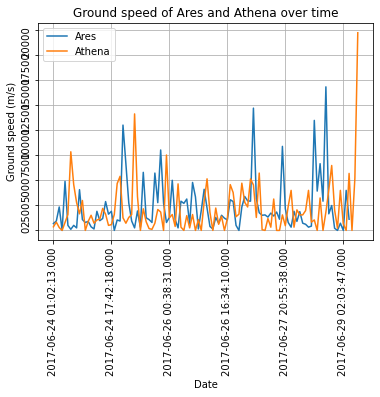

In [24]:
# subset to a few cats
# create a list of Phrases of interest
cat_name = ['Ares', 'Athena']

# subset dataframe
cats_uk_sub = cats_uk[cats_uk['individual-local-identifier'].isin(cat_name)]

#define index column (necessary when using groupby)
cats_uk_sub.set_index('timestamp', inplace=True)

# groupby and plot
cats_uk_sub.groupby('individual-local-identifier')['ground-speed'].plot(legend = True)
plt.legend(loc='upper left')
plt.xlabel('Date')  #adding labels
plt.ylabel('Ground speed (m/s)')
plt.title("Ground speed of Ares and Athena over time") #adding a title
plt.grid()   # adding a grid to the background
plt.tick_params(rotation=90)
plt.show()

Not only can you make line charts, but other types of charts as well. For example, we could make a bar plot of the average ground speed for each cat.

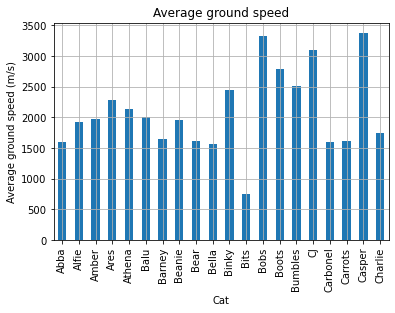

In [27]:
#first calculate the average ground speed for each cat
cats_uk_avg = cats_uk.groupby('individual-local-identifier')['ground-speed'].mean()

# let subet to the first 20 cats to make the chart more manageable
cats_uk_avg = cats_uk_avg.iloc[0:20,]

#calling .plot from the arts data frame
cats_uk_avg.plot.bar('individual-local-identifier', 'ground-speed', 
          title = "Average ground speed", ylabel = "Average ground speed (m/s)", xlabel = "Cat", 
          grid = True) # specifying additional info from within
plt.show()